# Circuit Shift-Invariance in Semantic Processing

**Investigating whether semantic circuits maintain consistent activation patterns across different contextual positions**

---

## Abstract

This research explores **shift-invariance** in transformer neural circuits - specifically whether semantic features that detect concepts like "Texas" maintain their activation patterns when the same content appears at different token positions or with varying contextual information.

## Research Question

> *Do circuit features that detect specific semantic concepts maintain their activation patterns when the same semantic content appears at different token positions in varied contexts?*

---

## Methodology

We analyze the "Texas" supernode from a circuit that processes geographical knowledge about Dallas and Austin. The supernode consists of 6 features across layers 4-20 that collectively represent the concept of Texas.

**Test Cases:**
1. **Position shift with unrelated context** - Adding irrelevant narrative text
2. **Position shift with related context** - Adding Texas-relevant historical information  
3. **Context with explicit mentions** - Including direct references to Texas

---

## Key Findings

### 🔍 **Finding 1: Near-Perfect Shift Invariance with Unrelated Context**

When we prepend completely unrelated context (sunset, trees, crickets), the Texas circuit **moves perfectly** to the new position:

```json
Activation ratios (new/old): [0.98, 1.03, 0.99, 0.98, 0.98, 0.91]
```
**Interpretation:** Ratios ≈ 1.0 indicate the circuit has successfully shifted to process the same semantic content at the new position.

### 🔍 **Finding 2: Partial Shift with Related Context**

With Texas-relevant historical context, the circuit shows **mixed behavior**:

```json
Activation ratios: [0.88, 1.00, 0.85, 0.86, 0.77, 1.09]
```
**Interpretation:** Some features maintain strength while others are partially activated by the earlier context.

### 🔍 **Finding 3: Circuit Distribution with Explicit Mentions**

When Texas is explicitly mentioned in context, the circuit shows **distributed activation**:

```json
Activation ratios: [0.58, 0.79, 0.81, 0.62, 0.61, 0.80]
```
**Interpretation:** The circuit forms earlier in the sequence, reducing activation at the target position.

---

## Implications

1. **Robust Position Invariance**: Semantic circuits can maintain functionality across different positions when context is irrelevant
2. **Context-Sensitive Processing**: Related context causes partial circuit formation at multiple positions
3. **Efficient Reuse**: Explicit mentions reduce redundant processing at later positions

---

## Technical Details

- **Model**: Gemma-2-2B with sparse autoencoders
- **Circuit**: 6-feature Texas supernode (layers 4, 7, 14, 16, 19, 20)
- **Baseline prompt**: "Fact: the capital of the state containing Dallas is"
- **Analysis**: Feature activation comparison across prompt variations

In [ ]:
import os
os.environ['HF_HOME'] = '/usr/scratch/danial_stuff/MechInterp/cache/'
os.environ['TRANSFORMERS_CACHE'] = '/usr/scratch/danial_stuff/MechInterp/cache/'

from huggingface_hub import login

HF_TOKEN = ""
login(token=HF_TOKEN)

IN_COLAB = False

os.environ['CUDA_VISIBLE_DEVICES'] = '7'
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

from collections import namedtuple
from typing import List, Dict

import torch

from circuit_tracer import ReplacementModel
from circuit_tracer.utils.decode_url_features import decode_url_features

model = ReplacementModel.from_pretrained("google/gemma-2-2b", 'gemma', dtype=torch.bfloat16)


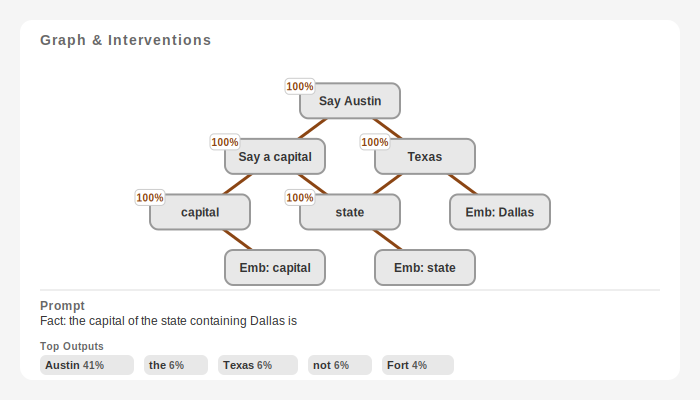

In [2]:
dallas_austin_url="https://www.neuronpedia.org/gemma-2-2b/graph?slug=gemma-fact-dallas-austin&clerps=%5B%5D&pruningThreshold=0.53&pinnedIds=27_22605_10%2C20_15589_10%2CE_26865_9%2C21_5943_10%2C23_12237_10%2C20_15589_9%2C16_25_9%2C14_2268_9%2C18_8959_10%2C4_13154_9%2C7_6861_9%2C19_1445_10%2CE_2329_7%2CE_6037_4%2C0_13727_7%2C6_4012_7%2C17_7178_10%2C15_4494_4%2C6_4662_4%2C4_7671_4%2C3_13984_4%2C1_1000_4%2C19_7477_9%2C18_6101_10%2C16_4298_10%2C7_691_10&supernodes=%5B%5B%22capital%22%2C%2215_4494_4%22%2C%226_4662_4%22%2C%224_7671_4%22%2C%223_13984_4%22%2C%221_1000_4%22%5D%2C%5B%22state%22%2C%226_4012_7%22%2C%220_13727_7%22%5D%2C%5B%22Texas%22%2C%2220_15589_9%22%2C%2219_7477_9%22%2C%2216_25_9%22%2C%224_13154_9%22%2C%2214_2268_9%22%2C%227_6861_9%22%5D%2C%5B%22preposition+followed+by+place+name%22%2C%2219_1445_10%22%2C%2218_6101_10%22%5D%2C%5B%22capital+cities+%2F+say+a+capital+city%22%2C%2221_5943_10%22%2C%2217_7178_10%22%2C%227_691_10%22%2C%2216_4298_10%22%5D%5D"
supernode_features, _ = decode_url_features(dallas_austin_url)

from graph_visualization import create_graph_visualization, Supernode, InterventionGraph, Feature

dallas_austin_url="https://www.neuronpedia.org/gemma-2-2b/graph?slug=gemma-fact-dallas-austin&clerps=%5B%5D&pruningThreshold=0.53&pinnedIds=27_22605_10%2C20_15589_10%2CE_26865_9%2C21_5943_10%2C23_12237_10%2C20_15589_9%2C16_25_9%2C14_2268_9%2C18_8959_10%2C4_13154_9%2C7_6861_9%2C19_1445_10%2CE_2329_7%2CE_6037_4%2C0_13727_7%2C6_4012_7%2C17_7178_10%2C15_4494_4%2C6_4662_4%2C4_7671_4%2C3_13984_4%2C1_1000_4%2C19_7477_9%2C18_6101_10%2C16_4298_10%2C7_691_10&supernodes=%5B%5B%22capital%22%2C%2215_4494_4%22%2C%226_4662_4%22%2C%224_7671_4%22%2C%223_13984_4%22%2C%221_1000_4%22%5D%2C%5B%22state%22%2C%226_4012_7%22%2C%220_13727_7%22%5D%2C%5B%22Texas%22%2C%2220_15589_9%22%2C%2219_7477_9%22%2C%2216_25_9%22%2C%224_13154_9%22%2C%2214_2268_9%22%2C%227_6861_9%22%5D%2C%5B%22preposition+followed+by+place+name%22%2C%2219_1445_10%22%2C%2218_6101_10%22%5D%2C%5B%22capital+cities+%2F+say+a+capital+city%22%2C%2221_5943_10%22%2C%2217_7178_10%22%2C%227_691_10%22%2C%2216_4298_10%22%5D%5D"
supernode_features, _ = decode_url_features(dallas_austin_url)

from graph_visualization import create_graph_visualization, Supernode, InterventionGraph, Feature

# Supernodes that upweight certain outputs. Note that e.g. the Say Austin node is not the only node promoting Austin, but that is its primary role
say_austin_node = Supernode(name='Say Austin', features=[Feature(layer=23, pos=10, feature_idx=12237)])
say_capital_node = Supernode(name='Say a capital', features=supernode_features['capital cities / say a capital city'], children=[say_austin_node])

# Intermediate nodes
texas_node = Supernode(name='Texas', features=supernode_features['Texas'], children=[say_austin_node])
state_node = Supernode(name='state', features=supernode_features['state'], children=[say_capital_node, texas_node])
capital_node = Supernode(name='capital', features=supernode_features['capital'], children=[say_capital_node])

# Embedding nodes
dallas_node = Supernode(name='Emb: Dallas', features=None, children=[texas_node])
state_emb_node = Supernode(name='Emb: state', features=None, children=[state_node])
capital_emb_node = Supernode(name='Emb: capital', features=None, children=[capital_node])


prompt = "Fact: the capital of the state containing Dallas is"
ordered_nodes = [[capital_emb_node, state_emb_node],[capital_node, state_node, dallas_node],[say_capital_node, texas_node], [say_austin_node]]
dallas_austin_graph = InterventionGraph(ordered_nodes=ordered_nodes, prompt=prompt)

logits, dallas_activations = model.get_activations(prompt)

# initialize each node, adding it to the intervention graph and recording its default activation
for node in [capital_node, state_node, dallas_node, say_capital_node, texas_node, say_austin_node]:
    dallas_austin_graph.initialize_node(node, dallas_activations)

# set each node's current activation to a percent of its default activation (here 100%)
dallas_austin_graph.set_node_activation_fractions(dallas_activations)

def get_top_outputs(logits: torch.Tensor, k: int = 5):
    top_probs, top_token_ids = logits.squeeze(0)[-1].softmax(-1).topk(k)
    top_tokens = [model.tokenizer.decode(token_id) for token_id in top_token_ids]
    top_outputs = list(zip(top_tokens, top_probs.tolist()))
    return top_outputs

top_outputs = get_top_outputs(logits)

# Save SVG to file
create_graph_visualization(dallas_austin_graph, top_outputs)

In [ ]:
# How well Texas supernode translates across prompts?
initial_prompt = "Fact: the capital of the state containing Dallas is"
token_supernode_pos = supernode_features['Texas'][0].pos
features = supernode_features['Texas']
initial_prompt_activates = dallas_activations

features_full_info = []

for feature in features:
    features_full_info.append({
        "layer": feature.layer,
        "pos": feature.pos,
        "feature_idx": feature.feature_idx,
        "activation": initial_prompt_activates[feature.layer, feature.pos, feature.feature_idx].item()
    })


features_full_info

[{'layer': 20, 'pos': 9, 'feature_idx': 15589, 'activation': 46.25},
 {'layer': 19, 'pos': 9, 'feature_idx': 7477, 'activation': 54.5},
 {'layer': 16, 'pos': 9, 'feature_idx': 25, 'activation': 27.125},
 {'layer': 4, 'pos': 9, 'feature_idx': 13154, 'activation': 15.25},
 {'layer': 14, 'pos': 9, 'feature_idx': 2268, 'activation': 25.375},
 {'layer': 7, 'pos': 9, 'feature_idx': 6861, 'activation': 14.5}]

In [15]:
modified_prompt = "The sun dipped below the horizon, painting the sky in shades of orange and purple. A gentle breeze rustled the leaves in the tall oak trees, and the evening chorus of crickets began to build. It was the perfect, quiet end to a long and uneventful summer day. Fact: the capital of the state containing Dallas is"
model.tokenizer.decode(model.tokenizer.encode(modified_prompt)[66])
new_token_supernode_pos = 66
_, new_prompt_activates = model.get_activations(modified_prompt)

new_features_full_info = []
for feature in features_full_info:
    new_features_full_info.append({
        "layer": feature["layer"],
        "pos": new_token_supernode_pos,
        "feature_idx": feature["feature_idx"],
        "new_activation": new_prompt_activates[feature["layer"], new_token_supernode_pos, feature["feature_idx"]].item(),
        "old_activation": feature["activation"],
        "ratio": new_prompt_activates[feature["layer"], new_token_supernode_pos, feature["feature_idx"]].item() / feature["activation"]
    })

new_features_full_info

[{'layer': 20,
  'pos': 66,
  'feature_idx': 15589,
  'new_activation': 45.5,
  'old_activation': 46.25,
  'ratio': 0.9837837837837838},
 {'layer': 19,
  'pos': 66,
  'feature_idx': 7477,
  'new_activation': 56.25,
  'old_activation': 54.5,
  'ratio': 1.0321100917431192},
 {'layer': 16,
  'pos': 66,
  'feature_idx': 25,
  'new_activation': 26.75,
  'old_activation': 27.125,
  'ratio': 0.9861751152073732},
 {'layer': 4,
  'pos': 66,
  'feature_idx': 13154,
  'new_activation': 14.9375,
  'old_activation': 15.25,
  'ratio': 0.9795081967213115},
 {'layer': 14,
  'pos': 66,
  'feature_idx': 2268,
  'new_activation': 24.75,
  'old_activation': 25.375,
  'ratio': 0.9753694581280788},
 {'layer': 7,
  'pos': 66,
  'feature_idx': 6861,
  'new_activation': 13.125,
  'old_activation': 14.5,
  'ratio': 0.9051724137931034}]

In [ ]:
modified_prompt = "It has a unique history, as it was once an independent republic before joining the United States in 1845. Fact: the capital of the state containing Dallas is"
model.tokenizer.decode(model.tokenizer.encode(modified_prompt)[45])
new_token_supernode_pos = 45
_, new_prompt_activates = model.get_activations(modified_prompt)

new_features_full_info = []
for feature in features_full_info:
    new_features_full_info.append({
        "layer": feature["layer"],
        "pos": new_token_supernode_pos,
        "feature_idx": feature["feature_idx"],
        "new_activation": new_prompt_activates[feature["layer"], new_token_supernode_pos, feature["feature_idx"]].item(),
        "old_activation": feature["activation"],
        "ratio": new_prompt_activates[feature["layer"], new_token_supernode_pos, feature["feature_idx"]].item() / feature["activation"]
    })

new_features_full_info


In [ ]:
modified_prompt = "From 1836 to 1845, after winning independence from Mexico, Texas existed as the Republic of Texas with its own president, military, and even currency. It only became the 28th state of the U.S. in 1845. Fact: the capital of the state containing Dallas is"
model.tokenizer.decode(model.tokenizer.encode(modified_prompt)[68])
new_token_supernode_pos = 68
_, new_prompt_activates = model.get_activations(modified_prompt)

new_features_full_info = []
for feature in features_full_info:
    new_features_full_info.append({
        "layer": feature["layer"],
        "pos": new_token_supernode_pos,
        "feature_idx": feature["feature_idx"],
        "new_activation": new_prompt_activates[feature["layer"], new_token_supernode_pos, feature["feature_idx"]].item(),
        "old_activation": feature["activation"],
        "ratio": new_prompt_activates[feature["layer"], new_token_supernode_pos, feature["feature_idx"]].item() / feature["activation"]
    })

print(new_features_full_info)

In [90]:
def get_top_outputs(logits: torch.Tensor, k: int = 5):
    top_probs, top_token_ids = logits.squeeze(0)[-1].softmax(-1).topk(k)
    top_tokens = [model.tokenizer.decode(token_id) for token_id in top_token_ids]
    top_outputs = list(zip(top_tokens, top_probs.tolist()))
    return top_outputs

top_outputs = get_top_outputs(_)

top_outputs

[(' Austin', 0.45703125),
 (' not', 0.10205078125),
 (' the', 0.061767578125),
 (' Texas', 0.048095703125),
 (' in', 0.04248046875)]

In [10]:
P_prime = [
    "Query: The governmental seat of the state encompassing Dallas is",
    "Riddle: I am the administrative center of the state where Dallas resides, and I am",
    "Geography Challenge: The political headquarters of the state containing Dallas is",
    "Complete: The executive capital of the state housing Dallas is",
    "Trivia Question: What city serves as the seat of power for the state where Dallas is located? Answer:",
    "Fill the blank: The governing metropolis of the state that includes Dallas is",
    "Statement: The administrative hub of the state encompassing Dallas is",
    "Brain Teaser: The political epicenter of the state where Dallas can be found is",
    "Quick Quiz: The capital city of the state that Dallas calls home is",
    "Knowledge Check: The seat of government for the state containing Dallas is"
]

In [67]:
# How well "Say a capital" supernode translates across prompts?
initial_prompt = "Fact: the capital of the state containing Dallas is"
token_supernode_pos = supernode_features['capital cities / say a capital city'][0].pos
features = supernode_features['capital cities / say a capital city']
_,initial_prompt_activates = model.get_activations(initial_prompt)

features_full_info = []

for feature in features:
    features_full_info.append({
        "layer": feature.layer,
        "pos": feature.pos,
        "feature_idx": feature.feature_idx,
        "activation": initial_prompt_activates[feature.layer, feature.pos, feature.feature_idx].item()
    })




features_full_info

[{'layer': 21, 'pos': 10, 'feature_idx': 5943, 'activation': 55.75},
 {'layer': 17, 'pos': 10, 'feature_idx': 7178, 'activation': 27.875},
 {'layer': 7, 'pos': 10, 'feature_idx': 691, 'activation': 16.625},
 {'layer': 16, 'pos': 10, 'feature_idx': 4298, 'activation': 20.25}]

In [76]:
modified_prompt = "Fact: the state capital of the territory containing Fort Worth is"
model.tokenizer.decode(model.tokenizer.encode(modified_prompt)[5])
new_token_supernode_pos = 6
_, new_prompt_activates = model.get_activations(modified_prompt)

new_features_full_info = []
for feature in features_full_info:
    new_features_full_info.append({
        "layer": feature["layer"],
        "pos": new_token_supernode_pos,
        "feature_idx": feature["feature_idx"],
        "new_activation": new_prompt_activates[feature["layer"], new_token_supernode_pos, feature["feature_idx"]].item(),
        "old_activation": feature["activation"],
        "ratio": new_prompt_activates[feature["layer"], new_token_supernode_pos, feature["feature_idx"]].item() / feature["activation"]
    })

new_features_full_info

[{'layer': 21,
  'pos': 6,
  'feature_idx': 5943,
  'new_activation': -0.0,
  'old_activation': 55.75,
  'ratio': -0.0},
 {'layer': 17,
  'pos': 6,
  'feature_idx': 7178,
  'new_activation': 19.25,
  'old_activation': 27.875,
  'ratio': 0.6905829596412556},
 {'layer': 7,
  'pos': 6,
  'feature_idx': 691,
  'new_activation': 17.875,
  'old_activation': 16.625,
  'ratio': 1.0751879699248121},
 {'layer': 16,
  'pos': 6,
  'feature_idx': 4298,
  'new_activation': -0.0,
  'old_activation': 20.25,
  'ratio': -0.0}]